# **Comprehensive Seaborn Tutorial: From Basics to Advanced**

Seaborn is a powerful Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn works seamlessly with Pandas DataFrames and offers beautiful default styles, color palettes, and built-in themes.
This tutorial progresses from basics to advanced topics, with runnable code examples. We'll use the built-in "tips" dataset (restaurant tips data) for most examples. Always run plt.show() after plotting to display the figure in your environment.

## 1. Installation and Setup

pip install seaborn matplotlib pandas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set a nice theme (optional, but recommended)
sns.set_theme(style="whitegrid")  # Options: darkgrid, whitegrid, dark, white, ticks

## 2. Loading Datasets
Seaborn comes with several example datasets:

In [ ]:
# List available datasets
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
# Load the 'tips' dataset
tips = sns.load_dataset("tips")
tips.head()

# Seaborn توفر بيانات جاهزة للتجربة والتعلّم بدون تحميل ملفات خارجية
# مثل: tips, titanic, iris, penguins وغيرها

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 3. Basic Plots: Distribution Plots
Start with visualizing single variables.
Histogram and KDE (Kernel Density Estimate)

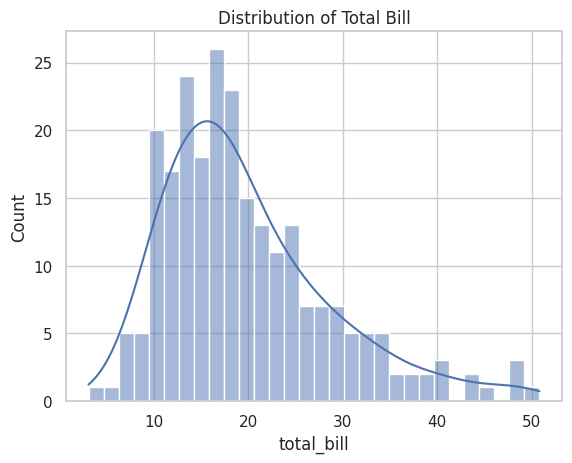

In [ ]:
# Histogram
sns.histplot(data=tips, x="total_bill", bins=30, kde=True)
plt.title("Distribution of Total Bill")
plt.show()

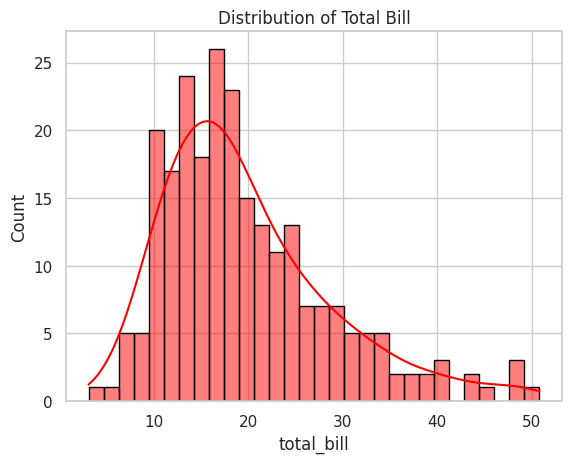

In [ ]:
# Histogram
sns.histplot(data=tips, x="total_bill", bins=30, kde=True, edgecolor="black",linewidth=1,  color="red")
plt.title("Distribution of Total Bill")
plt.show()

Rug Plot (shows individual data points)

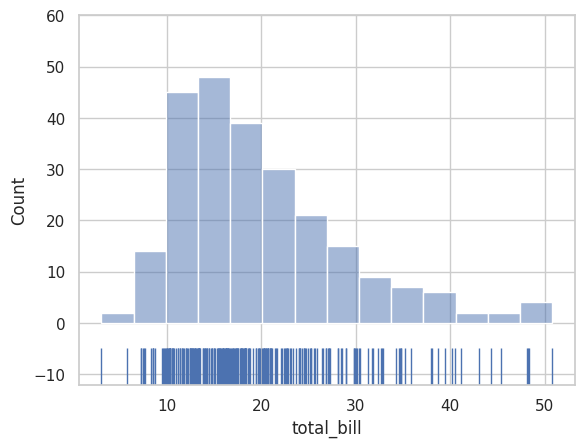

In [ ]:
sns.rugplot(data=tips, x="total_bill", height=0.1)
sns.histplot(data=tips, x="total_bill", alpha=0.5)
plt.show()

<Axes: xlabel='total_bill'>

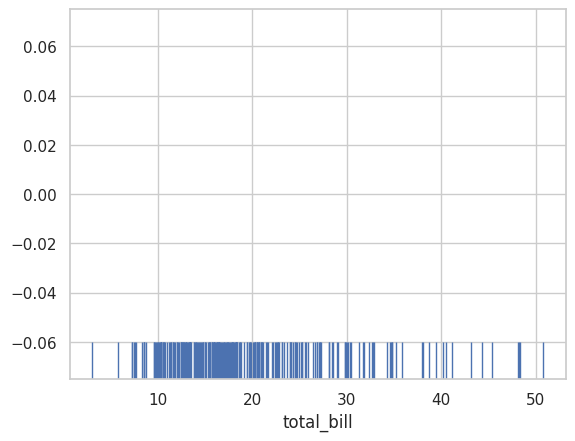

In [ ]:
sns.rugplot(data=tips, x="total_bill", height=0.1)

Advanced Distribution: displot (figure-level)

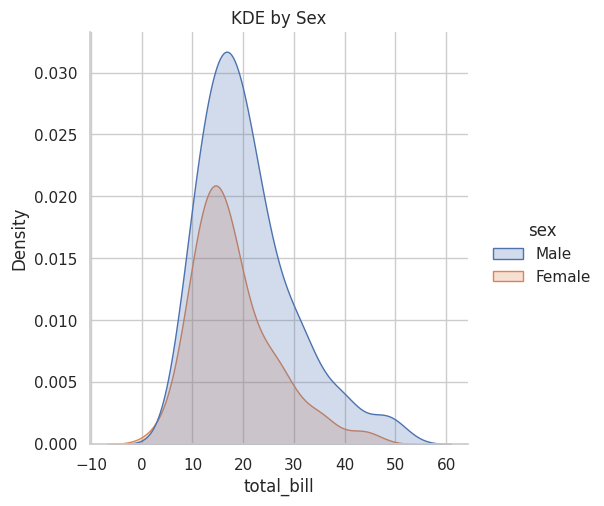

In [ ]:
sns.displot(data=tips, x="total_bill", kind="kde", hue="sex", fill=True)
plt.title("KDE by Sex")
plt.show()

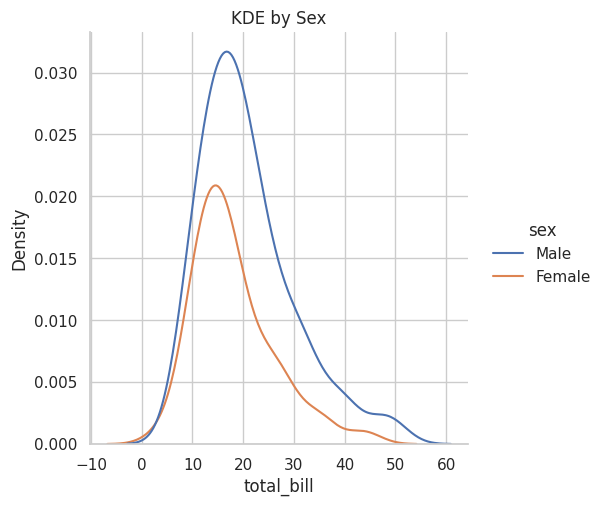

In [ ]:
sns.displot(data=tips, x="total_bill", kind="kde", hue="sex")
plt.title("KDE by Sex")
plt.show()

1️⃣ `sns.lmplot`

دالة من **Seaborn** لرسم **Linear Model Plot**.

ده يعني رسم نقاط البيانات مع **خط الانحدار (Regression line)**.

مفيد جدًا لفهم العلاقة بين متغيرين كميين.


---------------
4️⃣ `col="time"`

يقسم الرسم إلى أعمدة حسب عمود `time`.

في بيانات **tips**، `time` = `"Lunch"` أو `"Dinner"`.

هتتحصلي على **رسم واحد للغداء** + **رسم واحد للعشاء** جنب بعض.

كل رسم يعرض العلاقة بين **الفاتورة** و**الإكرامية** في هذا الوقت.


---------
5️⃣ `hue="smoker"`

يفصل البيانات حسب **المدخنين وغير المدخنين**.

كل فئة لها **لون مختلف تلقائيًا**.

الخط الانحداري (**Regression line**) هيتحسب لكل فئة لوحدها.

-------------------------

🔹 **النتيجة النهائية:**

- الرسم هيبقى **Scatter plot (نقاط)** + **خط الانحدار لكل مجموعة**  
- الأعمدة هتكون حسب وقت الزيارة (`Lunch` / `Dinner`)  
- الألوان هتمثل حالة **التدخين**


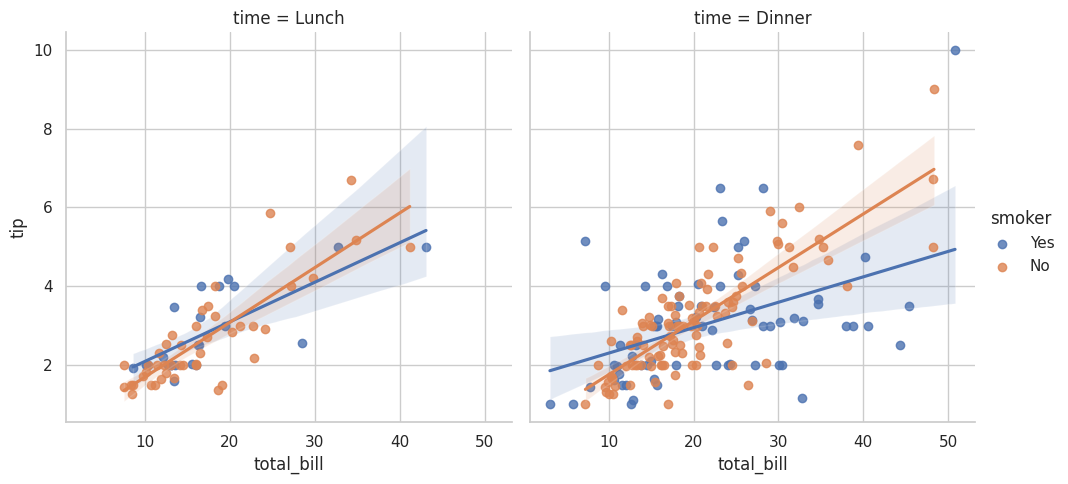

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")  # العلاقة بين قيمة الفاتورة و الإكرامية

# تحليل الرسم باستخدام Seaborn `lmplot`

---

## 1️⃣ تقسيم الأعمدة حسب الوقت (`col="time"`)

الرسم مقسوم لعمودين (**Facets**):

- **اليسار:** Lunch (الغداء)  
- **اليمين:** Dinner (العشاء)  

هذا يجعلنا نقارن توزيع الإكراميات بين الغداء والعشاء بسهولة.

---

## 2️⃣ النقاط (**Scatter Plot**)

كل نقطة تمثل زبون واحد:

- **المحور X:** قيمة الفاتورة (`total_bill`)  
- **المحور Y:** الإكرامية (`tip`)  

لون النقطة يعتمد على حالة التدخين (`hue="smoker"`):

- 🔵 أزرق: مدخن (Yes)  
- 🟠 برتقالي: غير مدخن (No)  

بهذا الشكل نعرف إذا كان التدخين له تأثير على الإكرامية.

---

## 3️⃣ خطوط الانحدار (**Regression Lines**)

- كل لون لديه خط انحدار يوضح العلاقة بين الفاتورة والإكرامية:  
  - 🔵 الخط الأزرق = مدخنين  
  - 🟠 الخط البرتقالي = غير مدخنين  

- المنطقة المظللة حول الخط: تمثل الـ **Confidence Interval** (مدى الثقة) لتوقع الخط.

### ماذا يمكن ملاحظته:

- غالبًا كلما زادت الفاتورة، زادت الإكرامية (**علاقة إيجابية**)  
- الخطوط مختلفة بين **Lunch** و **Dinner** → سلوك الزبائن يختلف حسب الوقت  
- الخطوط تختلف بين المدخنين وغير المدخنين → التدخين له تأثير على متوسط الإكرامية

---

## 4️⃣ الخلاصة من الرسم

| المعلومة | الملاحظات |
|----------|------------|
| العلاقة بين `total_bill` و `tip` | علاقة إيجابية واضحة (كلما زادت الفاتورة، زادت الإكرامية) |
| اختلاف الوقت (Lunch vs Dinner) | العشاء يبدو أكثر تشتتًا في القيم، والغداء أكثر تركيزًا |
| تأثير التدخين (`smoker`) | لكل فئة خط خاص يوضح ميل الإكرامية حسب التدخين |


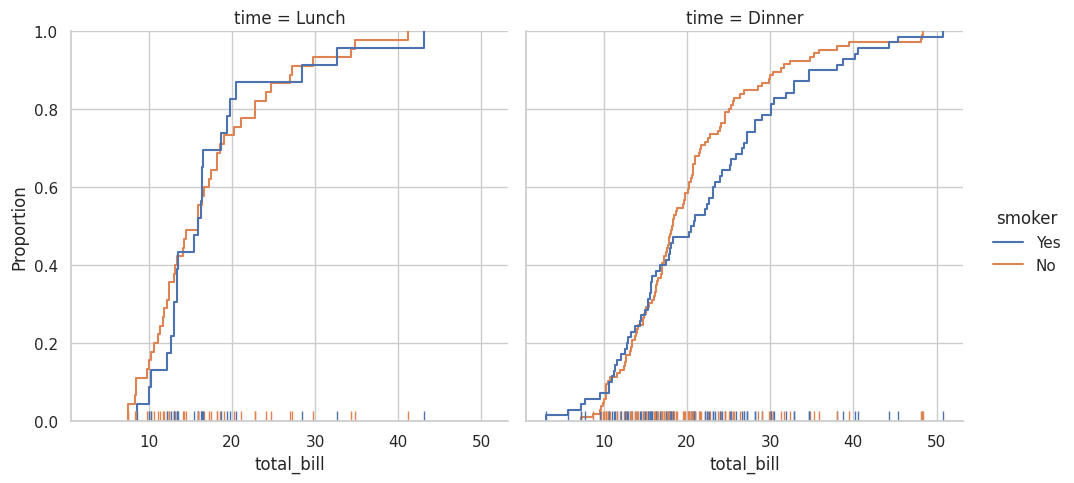

In [ ]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

كل قيمة Y = النسبة المئوية للصفوف في البيانات التي تكون قيمة total_bill لها أقل من أو تساوي القيمة عند X.
مثال:

لو عند total_bill = 20، قيمة Y = 0.6 → معناها 60% من الفواتير كانت ≤ 20 دولار.

# تحليل الرسم باستخدام Seaborn `displot`

---

## 1️⃣ `sns.displot`

دي دالة من **Seaborn** لرسم **Distribution Plot (توزيع البيانات)**.

ممكن ترسم **Histogram** أو **KDE** أو **ECDF** حسب قيمة `kind`.

---

## 2️⃣ `kind="ecdf"`

معناها **Empirical Cumulative Distribution Function**.

الرسم ده يوضح **التوزيع التراكمي للبيانات**.

كل نقطة على الخط تمثل:  

> النسبة المئوية للقيم اللي أقل أو تساوي القيمة الحالية على المحور X

**مثال مبسط:**

لو عندك 100 فاتورة:  
- 30 منهم أقل من أو تساوي 15 → الخط عند `X=15` يكون عند `Y≈0.3`

الرسم مهم لفهم كيف تتوزع البيانات **تراكمياً** بدل التوزيع الكلاسيكي (**Histogram**).

---

## 3️⃣ `x="total_bill"`

المحور X هيكون العمود `total_bill` (**قيمة الفاتورة**).

---

## 4️⃣ `col="time"`

يقسم الرسم إلى أعمدة (**Facets**) حسب عمود `time`.

في بيانات **tips** → `"Lunch"` و `"Dinner"`.

هتتحصلي على رسم منفصل لكل وقت، لتسهيل المقارنة.

---

## 5️⃣ `hue="smoker"`

الخطوط هتفصل حسب حالة التدخين (`smoker`).

كل فئة لون مختلف تلقائيًا:  
- **مدخن (Yes)**  
- **غير مدخن (No)**

---

## 6️⃣ `rug=True`

يضيف **Rug plot** تحت الرسم.  

- كل نقطة صغيرة = قيمة فردية من `total_bill`  
- يساعد على رؤية أماكن تراكم القيم الفعلية بدقة

---

## 7️⃣ النتيجة النهائية

- **X-axis:** قيمة الفاتورة  
- **Y-axis:** التوزيع التراكمي (0 → 1)  
- **الأعمدة:** حسب وقت الزيارة  
- **ألوان الخطوط:** حسب التدخين  
- **الشرطات الصغيرة تحت الرسم:** كل قيمة فردية  

> الرسم ده مفيد جدًا لمعرفة من يتركز في أي مستوى من الفواتير وكيف يختلف بين **Lunch/Dinner** وبين **المدخنين وغير المدخنين**.


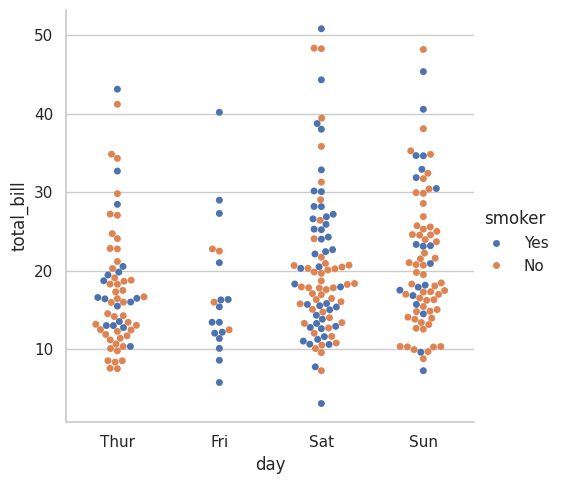

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

# 1️⃣ sns.catplot

دي دالة من مكتبة **Seaborn** لرسم **categorical plots** أي الرسوم البيانية التي تتعامل مع متغيرات تصنيفية (categorical).

هنا بنستخدم `kind="swarm"`، ده نوع خاص اسمه **Swarm Plot**.

---

# 2️⃣ kind="swarm"

**Swarm Plot** بيعرض كل نقطة بيانات حقيقية كدائرة (marker) على الجراف.

**الفكرة:**

- كل نقطة تمثل فاتورة واحدة `total_bill`.
- النقاط مرتبة بحيث لا تتداخل على المحور X، حتى لو في قيم مكررة.
- ده بيسمحلك تشوف **التوزيع الحقيقي للبيانات لكل تصنيف**.

---

# 3️⃣ x="day"

- المحور X فيه الأيام (`Thur`, `Fri`, `Sat`, `Sun`).
- كل يوم بيكون **تصنيف مستقل** على المحور X.

---

# 4️⃣ y="total_bill"

- المحور Y فيه **قيمة الفاتورة**.
- كل دائرة (نقطة) تمثل **فاتورة فعلية** في البيانات.

---

# 5️⃣ hue="smoker"

- النقاط بتتلوّن حسب كون الزبون **مدخن (`Yes`)** أو **غير مدخن (`No`)**.
- بيسهّل المقارنة بين المجموعتين في كل يوم.

---

## 💡 النتيجة النهائية:

- هتشوف **نقاط مفردة لكل فاتورة** مرتبة بشكل جميل لكل يوم.
- الألوان توضح إذا كان الزبون مدخن أو لا.
- من الجراف ده تقدر تلاحظ:
  - الأيام اللي فيها **فواتير أكبر أو أصغر بشكل عام**.
  - الاختلاف بين **المدخنين وغير المدخنين**.


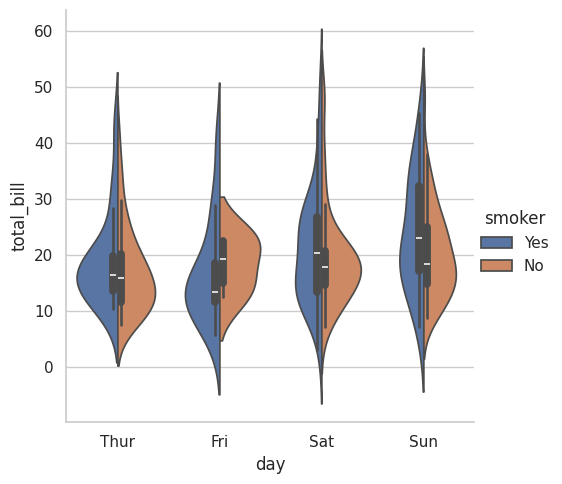

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

# 1️⃣ sns.catplot

دالة من مكتبة **Seaborn** لرسم **categorical plots**، أي الرسوم البيانية اللي بتتعامل مع **متغيرات تصنيفية**.

هنا `kind="violin"`، يعني هنعمل **Violin Plot**.

---

# 2️⃣ kind="violin"

**Violin Plot** هو رسم بياني بيجمع بين **Box Plot** و **Kernel Density Estimate (KDE)**.

**الشكل الخارجي للـ violin بيوريك توزيع البيانات على طول المحور Y:**

- اتساع الجزء العريض → يعني فيه **عدد أكبر من الفواتير في المنطقة دي**.  
- الجزء الرفيع → يعني فيه **عدد أقل من الفواتير**.  

جوه الـ violin ممكن يظهر **Box Plot صغير** يوضح **الوسيط (median) والربعيات (quartiles)**.

---

# 3️⃣ x="day"

- المحور X فيه الأيام (`Thur`, `Fri`, `Sat`, `Sun`).  
- كل يوم بيكون **تصنيف مستقل** على المحور X.

---

# 4️⃣ y="total_bill"

- المحور Y فيه **قيمة الفاتورة**.  
- الرسم يعرض **توزيع الفواتير لكل يوم**.

---

# 5️⃣ hue="smoker"

- البيانات مقسومة حسب كون الزبون **مدخن (`Yes`)** أو **غير مدخن (`No`)**.  
- كل مجموعة لها **لون مختلف داخل الـ violin**.

---

# 6️⃣ split=True

لما تستخدم `split=True`:  

- الـ violin الواحد بيتقسم **إلى نصفين لكل لون**، بدل ما يكون عندك violin منفصل لكل مجموعة.  
- ده بيسهّل **مقارنة المدخنين وغير المدخنين داخل نفس اليوم**.

---

## 💡 النتيجة النهائية

- هتشوف **violin لكل يوم**، وكل violin مقسم **نصف لنسبة المدخنين ونصف لغير المدخنين**.  
- بتقدر بسهولة تشوف:  
  - **التوزيع العام للفواتير لكل يوم**.  
  - **هل المدخنين بيدفعوا أكتر ولا أقل مقارنة بغير المدخنين**.  
  - **الوسيط والربعيات لكل مجموعة**.


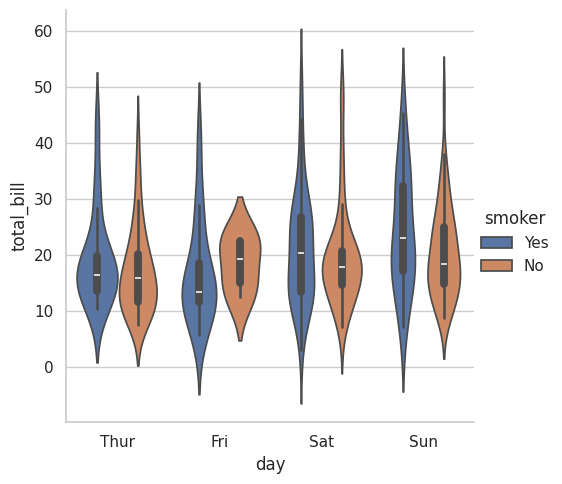

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=False)

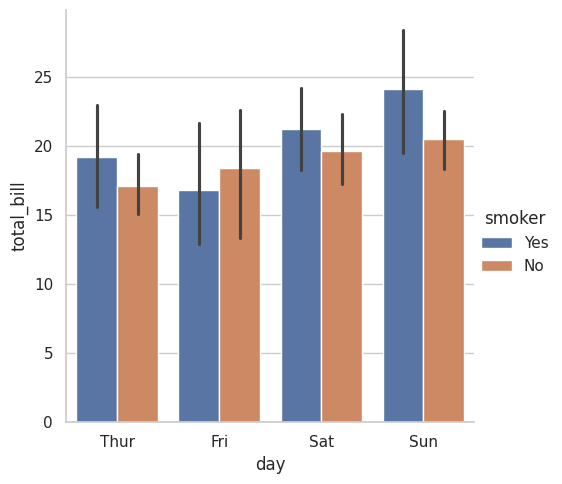

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## تحميل مجموعة بيانات البطاريق باستخدام Seaborn

هنا بنستخدم دالة `load_dataset` من مكتبة **Seaborn** لتحميل مجموعة بيانات جاهزة اسمها `penguins`.  

مجموعة البيانات دي عبارة عن بيانات عن أنواع البطاريق وتشمل أعمدة مثل:

- `species` → نوع البطريق  
- `flipper_length_mm` → طول الزعانف بالمليمتر  
- `bill_length_mm` → طول المنقار بالمليمتر  
- `bill_depth_mm` → عمق المنقار بالمليمتر  
- `body_mass_g` → وزن الجسم بالغرام  
- وغيرها من الأعمدة المهمة


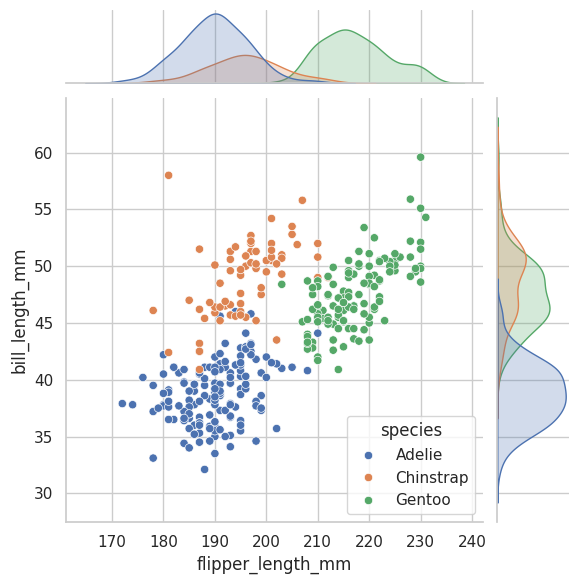

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

## 2️⃣ استخدام `sns.jointplot(...)`

**Joint Plot** هو نوع من الرسوم البيانية بيجمع بين:

- **Scatter Plot** أو نوع آخر على المحورين X و Y  
- **Histogram** أو **KDE** لكل محور على حدة  

**الغرض:** تشوف العلاقة بين متغيرين بالإضافة لتوزيع كل واحد منهم.

---

## 3️⃣ تحديد البيانات: `data=penguins`

بنحدد البيانات اللي هنشتغل عليها، هنا بيانات البطاريق.

---

## 4️⃣ المحاور: `x="flipper_length_mm"` و `y="bill_length_mm"`

- **المحور X** = طول الزعانف بالمليمتر  
- **المحور Y** = طول المنقار بالمليمتر  

كل نقطة على الرسم تمثل بطريق واحد مع القيمتين دول.

---

## 5️⃣ اللون حسب النوع: `hue="species"`

اللون بيختلف حسب نوع البطريق (**Adelie**, **Chinstrap**, **Gentoo**).  
ده بيساعدك تفرق بين الأنواع بسهولة على الرسم.

---

## 💡 النتيجة النهائية

- هتشوف **Scatter Plot** لكل البطاريق، كل نقطة لونها حسب النوع.  
- على الجانبين، هتشوف **Histogram** يوضح توزيع كل متغير (طول الزعانف وطول المنقار).  

ده بيسهّل عليك:

1. فهم العلاقة بين طول الزعانف وطول المنقار.  
2. مقارنة الأنواع المختلفة ببعضها.


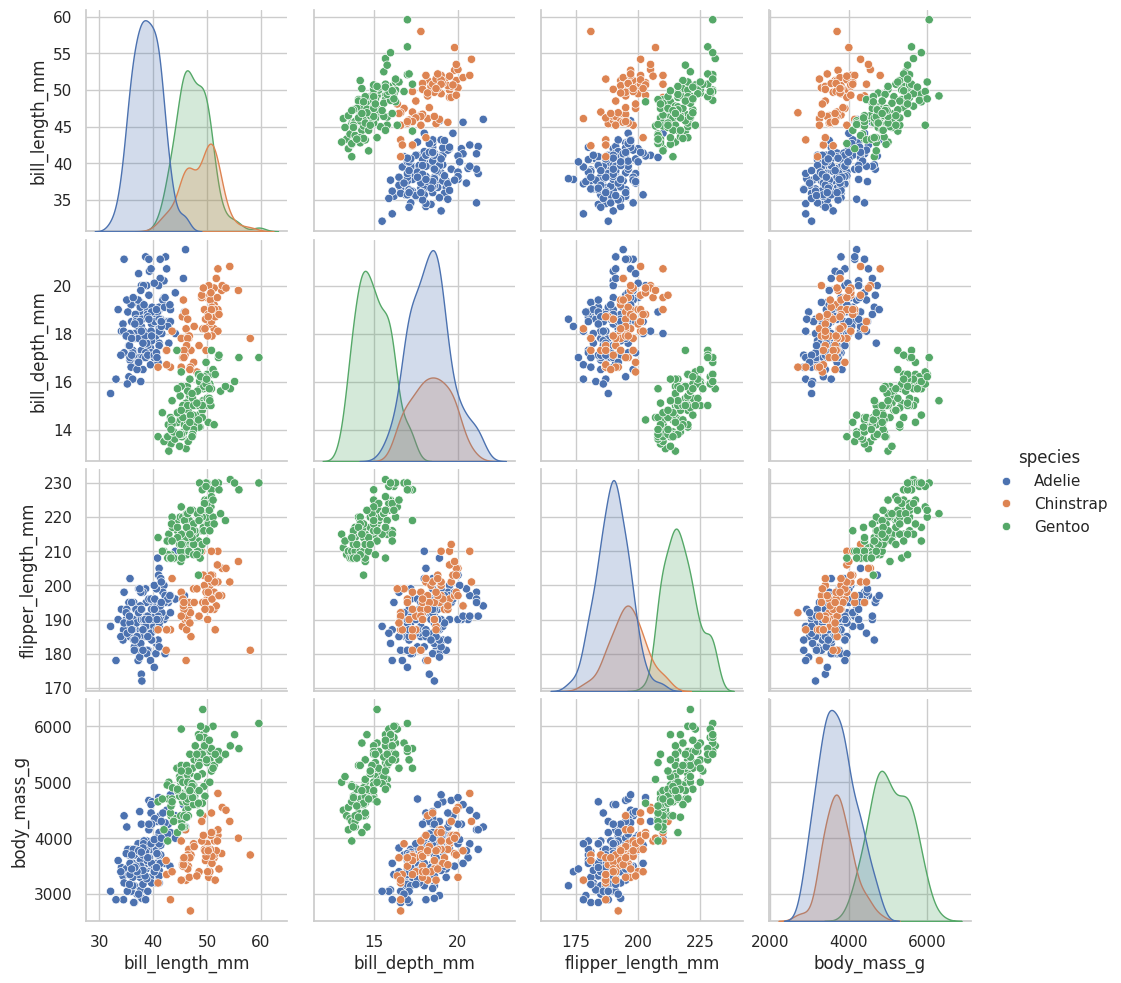

In [ ]:
sns.pairplot(data=penguins, hue="species")

# 1️⃣ `sns.pairplot`

دالة من مكتبة **Seaborn** لعمل **Pair Plot**.  

**Pair Plot** هو رسم بياني يوضح كل المتغيرات الرقمية مقابل بعضها البعض في **مصفوفة من الرسوم**.

- كل عمود مقابل كل عمود:
  - **Scatter Plot** بين المتغيرين المختلفين.
  - **Histogram** أو **KDE** على القطر الرئيسي (**diagonal**) لكل متغير بمفرده.

---

# 2️⃣ `data = penguins`

البيانات اللي هنستخدمها، هنا بيانات البطاريق من مكتبة **Seaborn**.  

البيانات فيها أعمدة رقمية مثل:

- `flipper_length_mm` → طول الزعانف  
- `bill_length_mm` → طول المنقار  
- `bill_depth_mm` → عمق المنقار  
- `body_mass_g` → وزن الجسم  

---

# 3️⃣ `hue="species"`

- كل نوع بطريق (**Adelie**, **Chinstrap**, **Gentoo**) له لون مختلف على كل الرسم.  
- ده بيساعدك تميّز الأنواع وتلاحظ الفروقات بينها.

---

💡 **النتيجة النهائية**

- هتشوف مصفوفة من الرسوم لكل زوج من المتغيرات الرقمية.  
- على القطر الرئيسي (**diagonal**) هتشوف توزيع كل متغير.  
- كل النقاط ملونة حسب نوع البطريق (**species**).  

ده بيساعدك على:  

- رؤية العلاقة بين كل زوج من المتغيرات.  
- مقارنة الفروقات بين الأنواع المختلفة.  
- اكتشاف الأنماط أو المجموعات في البيانات.


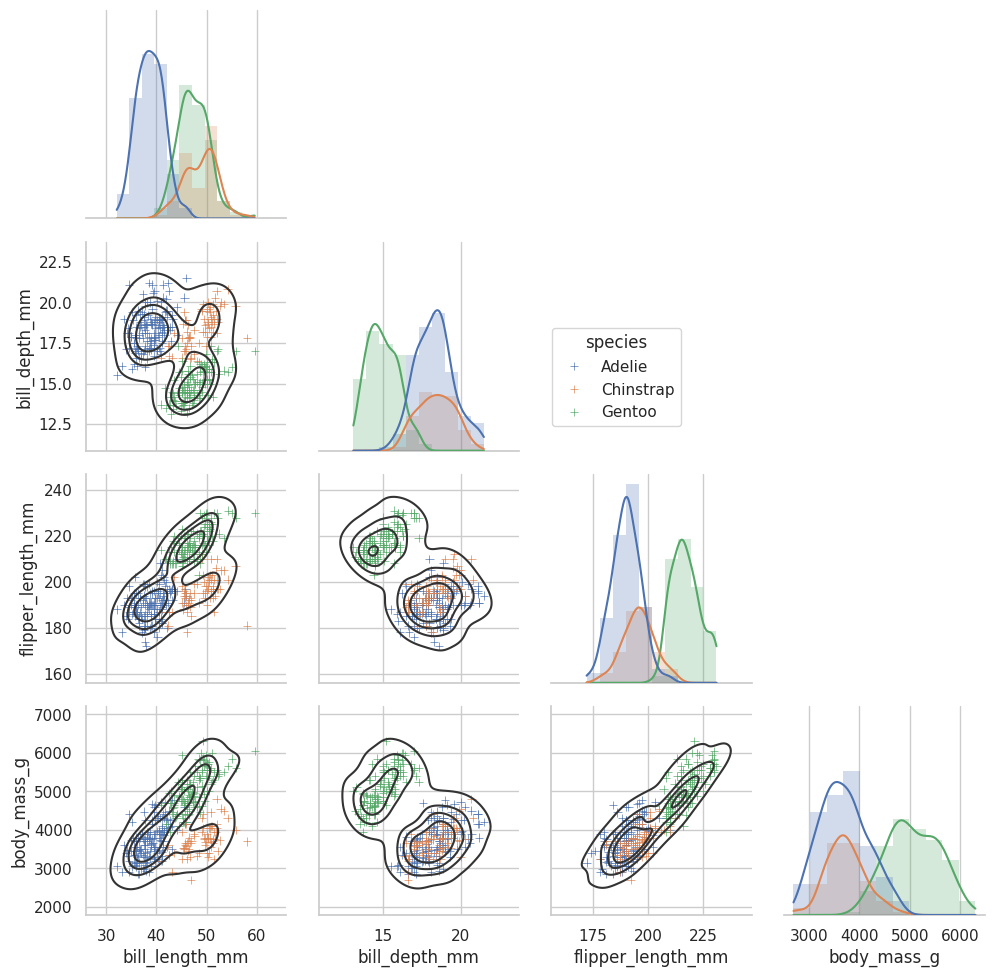

In [ ]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

# 1️⃣ `sns.PairGrid(penguins, hue="species", corner=True)`

- **PairGrid**: نسخة متقدمة من **PairPlot** تعطيك مرونة أكبر للتحكم في كل جزء من الرسم.  
- `penguins` → البيانات اللي هنشتغل عليها.  
- `hue="species"` → كل نوع بطريق له لون مختلف.  
- `corner=True` → معناه هيرسم **نصف المصفوفة فقط أسفل القطر الرئيسي** (**diagonal**) بدل رسم كل الزوجين مرتين.  
  - هذا يقلل التكرار ويخلي الرسم أوضح.

---

# 2️⃣ `g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")`

- `map_lower` → بيرسم على النصف السفلي من المصفوفة (أسفل القطر الرئيسي).  
- `sns.kdeplot` → رسم **تقدير كثافة النواة** (**Kernel Density Estimate**).  
- `hue=None` → لن يرسم حسب النوع هنا (يظهر كثافة عامة لكل زوج من المتغيرات).  
- `levels=5` → عدد خطوط الكثافة (**contour lines**) = 5.  
- `color=".2"` → لون رمادي داكن للخطوط.  

**الغرض:** يعطيك فكرة عن توزيع النقاط وكثافة الاحتمال لكل زوج من المتغيرات.

---

# 3️⃣ `g.map_lower(sns.scatterplot, marker="+")`

- بعد رسم خطوط الكثافة، نضيف نقاط **scatter** على نفس المخطط.  
- `marker="+"` → كل نقطة على شكل علامة +.  

**الغرض:** دمج النقاط الفعلية مع تقدير الكثافة لتوضيح العلاقة بين المتغيرات.

---

# 4️⃣ `g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)`

- `map_diag` → بيرسم على القطر الرئيسي (**diagonal**) لكل متغير.  
- `sns.histplot` → رسم **Histogram**.  
- `element="step"` → الهيستوجرام على شكل خطوط متدرجة بدل الأشرطة الملونة.  
- `linewidth=0` → لا يوجد حدود للشريط (يظهر كخط).  
- `kde=True` → يرسم خط تقدير الكثافة فوق الهيستوجرام.  

**الغرض:** توضيح توزيع كل متغير منفردًا.

---

# 5️⃣ `g.add_legend(frameon=True)`

- يضيف **Legend** (مفتاح الألوان) يوضح كل لون يمثل أي نوع بطريق.  
- `frameon=True` → يضيف إطار حول الـ Legend.

---

# 6️⃣ `g.legend.set_bbox_to_anchor((.61, .6))`

- تحريك موقع الـ Legend على الرسم.  
- `(0.61, 0.6)` → الإحداثيات داخل الـ Figure (يمين/أعلى).  
- يسمح لك وضع المفتاح في مكان مناسب بدون أن يعيق الرسم.

---

💡 **النتيجة النهائية**

- هتحصل على **مخطط متعدد المتغيرات متقدم**:  
  - **أسفل القطر** → خطوط KDE + Scatter لكل زوج من المتغيرات.  
  - **القطر الرئيسي** → Histogram + KDE لكل متغير.  
- كل نوع بطريق له لون مختلف في Scatter و Histogram.  
- Legend واضح وموجود في مكان مناسب.


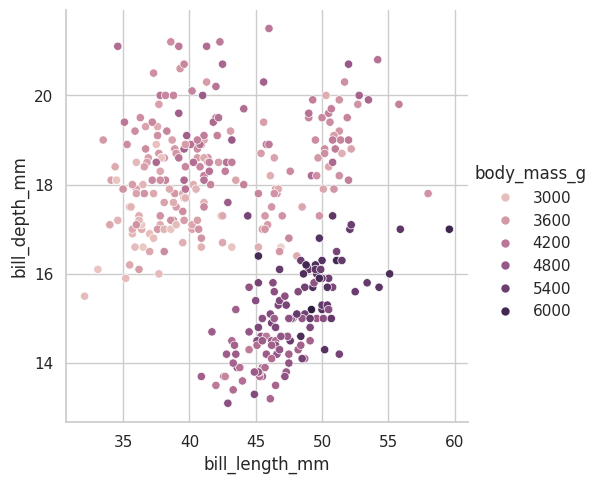

In [ ]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

# `sns.relplot`

- دالة من مكتبة **Seaborn** لرسم **Relationship Plots**، أي الرسوم التي تُظهر العلاقة بين متغيرين.  
- بشكل افتراضي، `relplot` يرسم **Scatter Plot** إذا لم تحدد `kind`.  
- يمكن أيضًا رسم **Line Plot** عند تمرير `kind="line"`.

---

# 2️⃣ `data = penguins`

- البيانات التي سيتم رسمها، هنا **مجموعة بيانات البطاريق**.

---

# 3️⃣ `x="bill_length_mm"` و `y="bill_depth_mm"`

- **المحور X** → طول المنقار بالمليمتر  
- **المحور Y** → عمق المنقار بالمليمتر  
- كل نقطة على الرسم تمثل **بطريق واحد** مع القيمتين دول.

---

# 4️⃣ `hue="body_mass_g"`

- اللون يعتمد على **وزن الجسم بالجرام** (`body_mass_g`).  
- هذا يعني: كل نقطة سيكون لها **درجة لون مختلفة حسب وزن البطريق**.  
- **الفكرة:** تقدر تشوف إذا فيه علاقة بين حجم الجسم وطول وعمق المنقار عن طريق تدرج اللون.

---

💡 **النتيجة النهائية**

- هتحصل على **Scatter Plot لكل البطاريق**:  
  - **المحور X** → طول المنقار  
  - **المحور Y** → عمق المنقار  
  - **اللون** → وزن البطريق  

- ده بيسمح لك بملاحظة الأنماط:  
  - البطاريق الأثقل وزنًا يميل لونها لجهة معينة من التدرج.  
  - العلاقة بين طول المنقار وعمقه.


In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


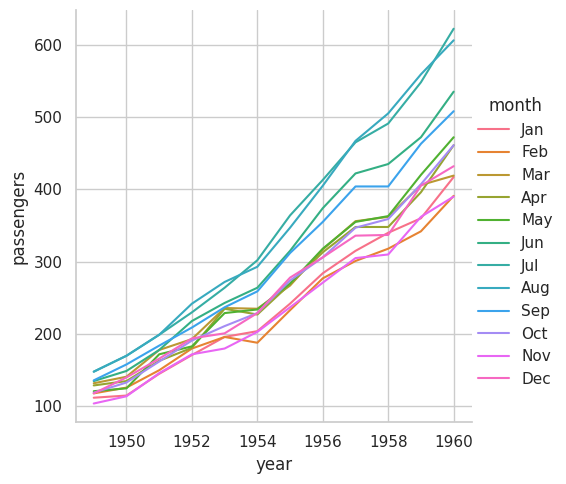

In [ ]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

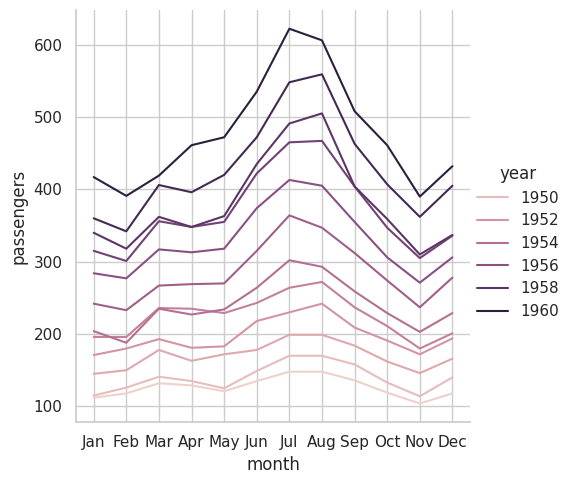

In [ ]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

In [ ]:
import seaborn.objects as so

# 1️⃣ `import seaborn.objects as so`

- ده الوضع الجديد في **Seaborn 1.8+** يسمى **Seaborn Objects API**.  
- يقدّم طريقة **مرنة جدًا لبناء الرسوم البيانية** باستخدام سلسلة من العمليات مثل:  
``` python
so.Plot().add()
   ```
بديل عن استخدام الدوال التقليدية مثل:

- sns.barplot

- sns.relplot

يسمح لك بالتحكم بشكل أدق في كل جزء من الرسم البياني.


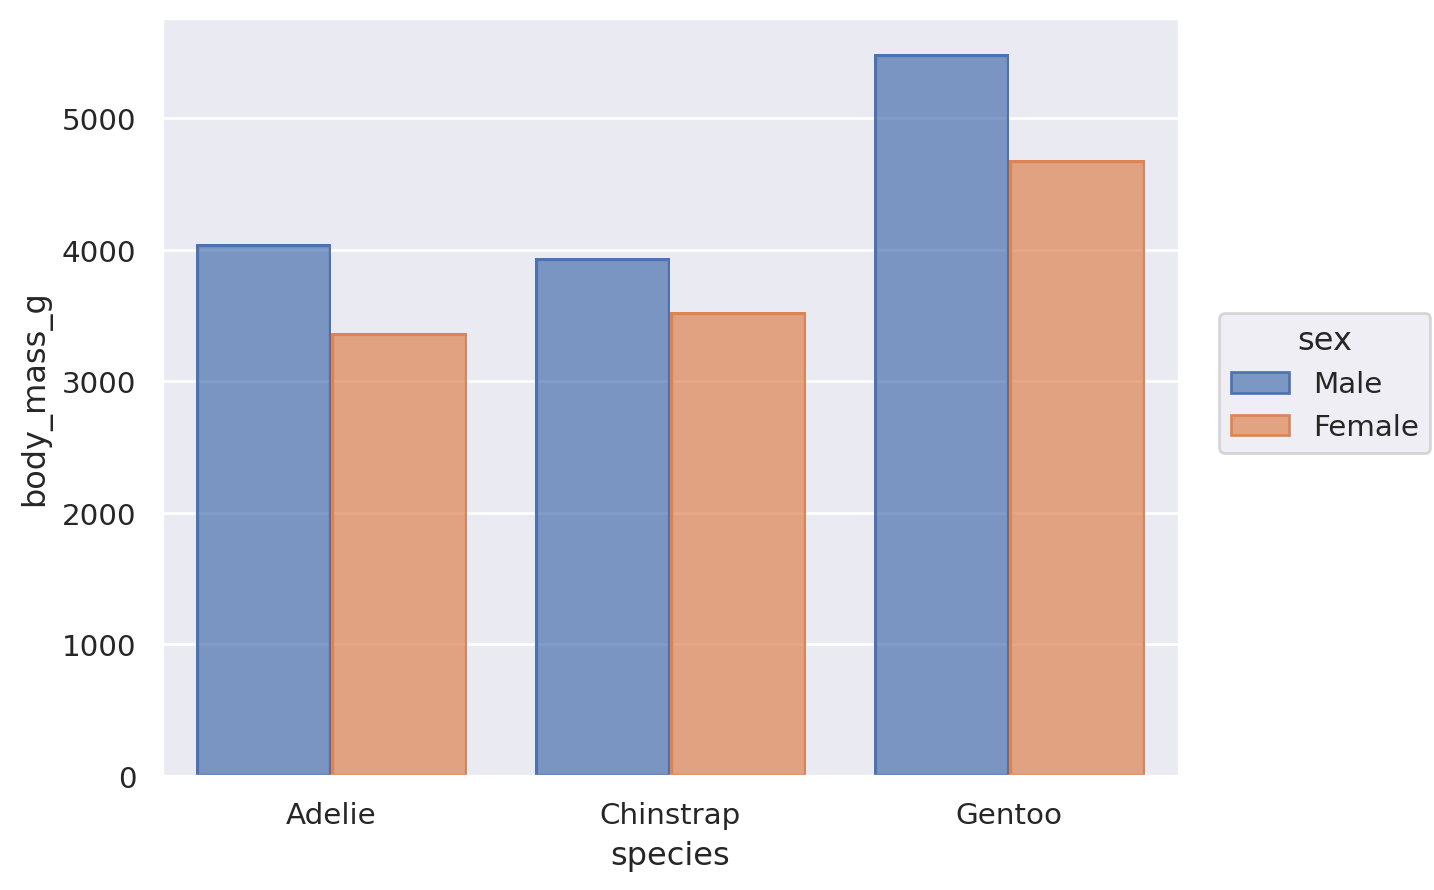

In [ ]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

# 1️⃣ `so.Plot(penguins, x="species", y="body_mass_g", color="sex")`

- **`so.Plot`** هي البداية لإنشاء رسم باستخدام **Seaborn Objects API**، وهي طريقة جديدة في Seaborn لبناء الرسوم البيانية بطريقة مرنة.  
- `penguins` → بياناتنا (**مجموعة بيانات البطاريق**).  
- `x="species"` → **المحور X** يمثل نوع البطريق (**Adelie, Chinstrap, Gentoo**).  
- `y="body_mass_g"` → **المحور Y** يمثل وزن الجسم بالجرام.  
- `color="sex"` → كل جنس (**male** أو **female**) يظهر بلون مختلف.  

> حتى الآن، فقط حددنا ما هي المتغيرات التي سنرسمها وما هو لون كل مجموعة.

---

# 2️⃣ `.add(so.Bar(), so.Agg(), so.Dodge())`

- `.add()` → تضيف **طبقة رسم (layer)** على الرسم الأساسي.  
- `so.Bar()` → نريد رسم **Bar Plot**.  
- `so.Agg()` → **التجميع (Aggregation)**: يعني الرسم سيحسب **المتوسط** (أو التجميع) لكل فئة تلقائيًا بدلاً من رسم كل نقطة بيانات.  
  - في حالتنا، سيتم حساب **متوسط وزن الجسم لكل جنس لكل نوع بطريق**.  
- `so.Dodge()` → يجعل **الأعمدة مفصولة جنبًا إلى جنب حسب اللون** بدل تراكبها.  
  - يعني لكل نوع بطريق، سيكون هناك عمود للذكور وعمود للإناث بجانب بعضهم.

---

💡 **النتيجة النهائية**

- الرسم سيكون **Bar Plot**:  
  - **X** → نوع البطريق  
  - **Y** → متوسط وزن الجسم  
  - **اللون** → الجنس (**male** أو **female**)  
- الأعمدة متباعدة (**dodge**) بحيث يمكن **مقارنة الذكور والإناث لكل نوع بسهولة**.


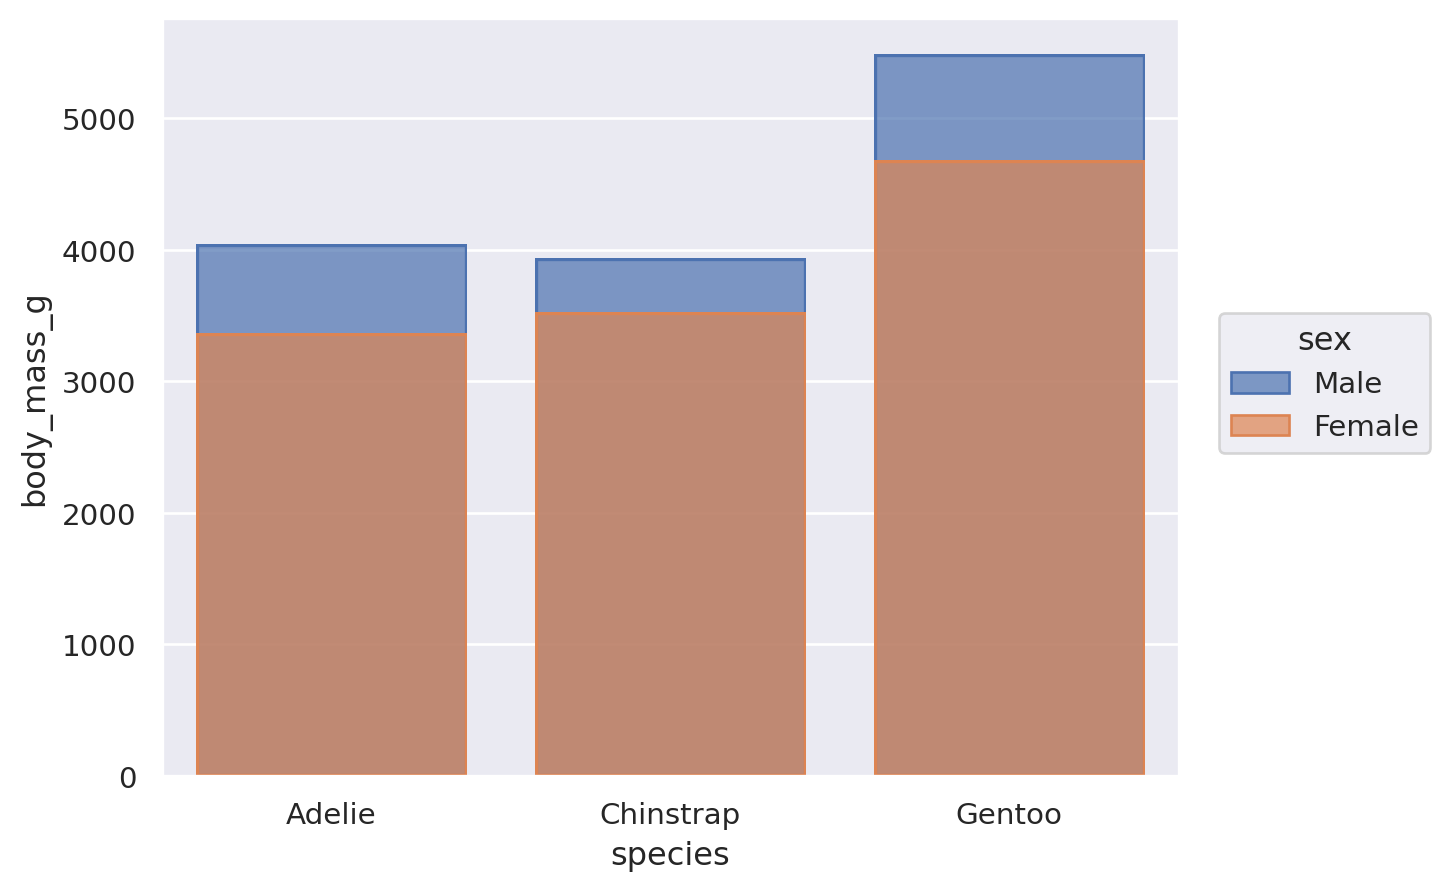

In [ ]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())   # Removing Dodge > so.Dodge()
)

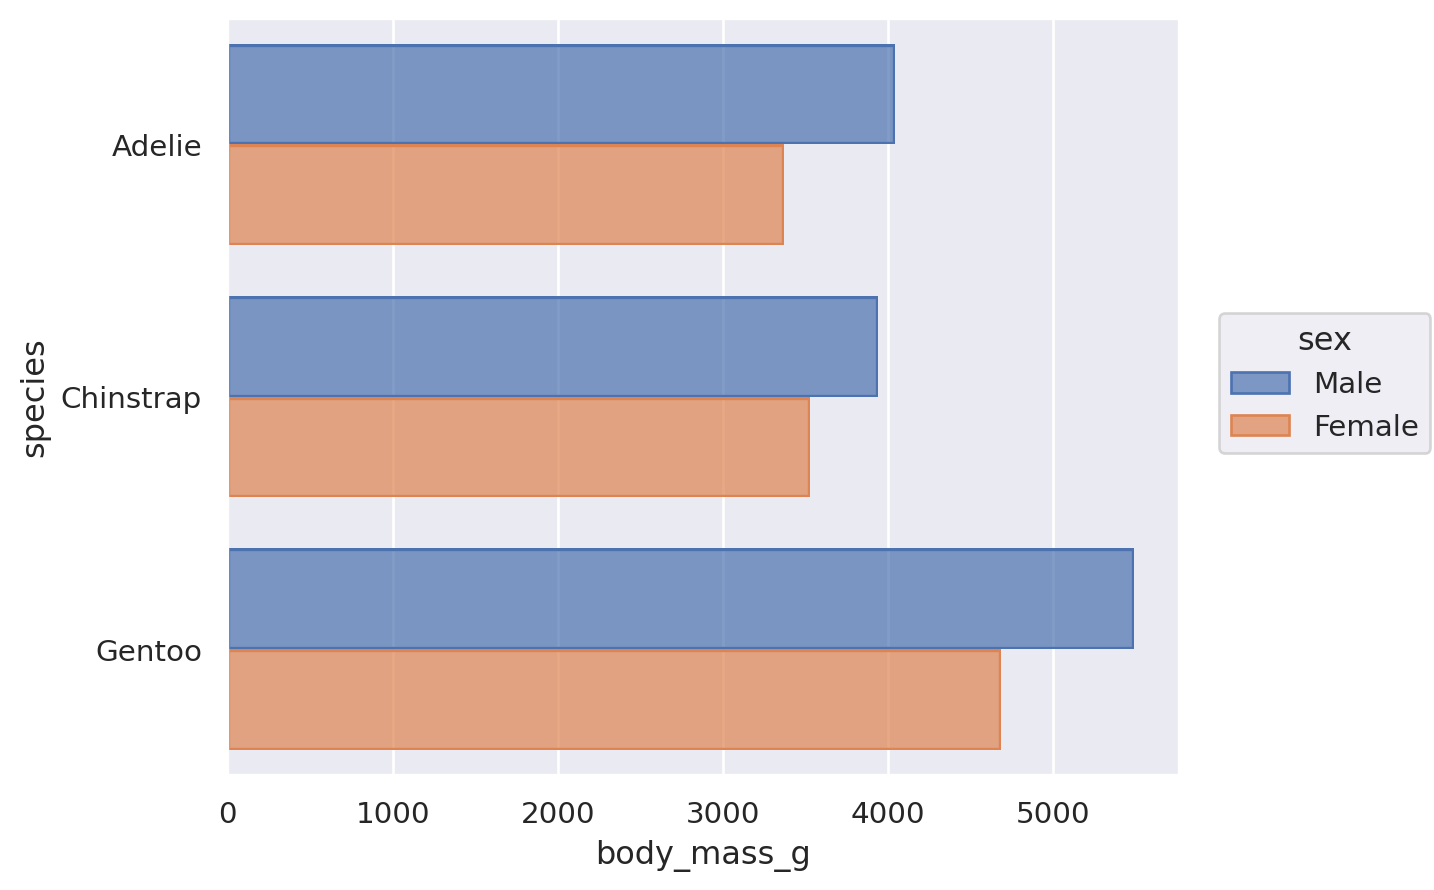

In [ ]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

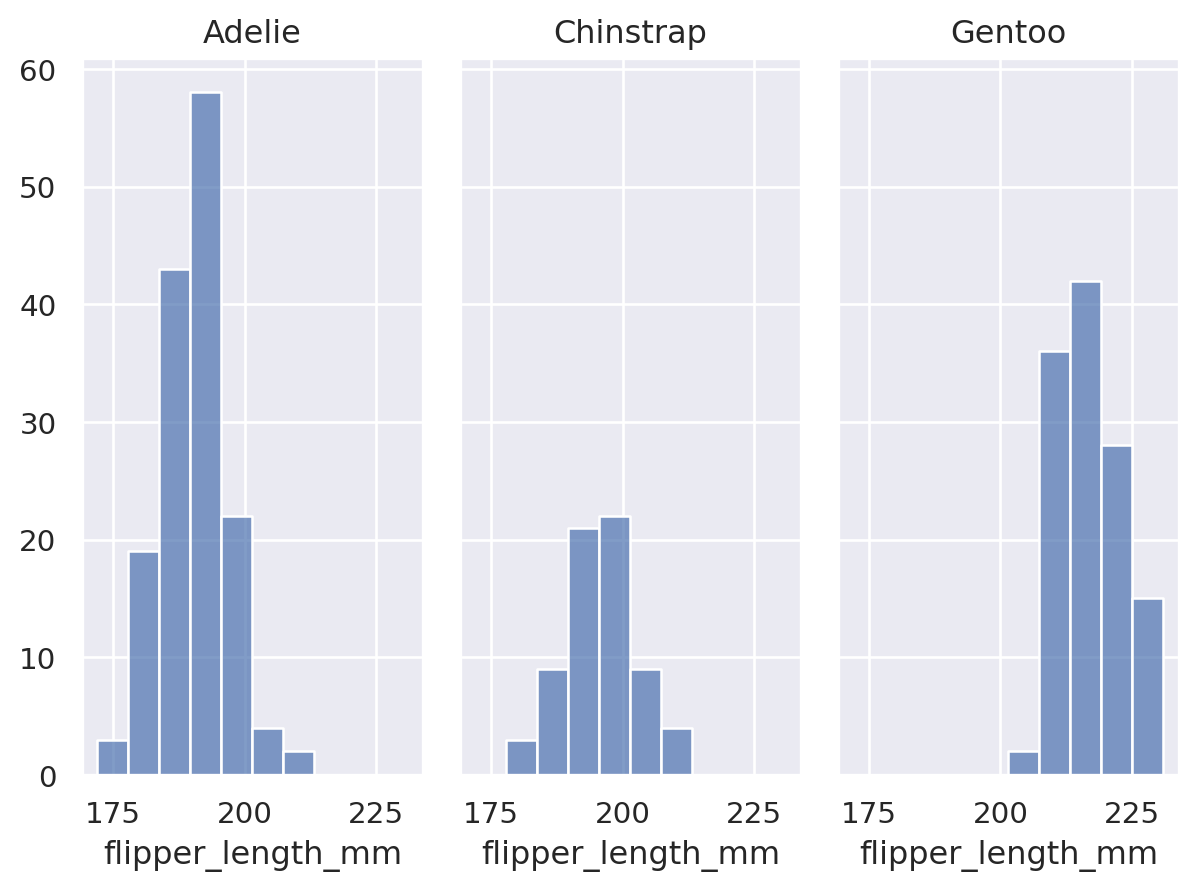

In [ ]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet("species")
    .add(so.Bars(), so.Hist())
)

# 1️⃣ `so.Plot(penguins, x="flipper_length_mm")`

- نبدأ برسم باستخدام **Seaborn Objects API**.  
- `penguins` → البيانات المستخدمة (**مجموعة بيانات البطاريق**).  
- `x="flipper_length_mm"` → **المحور X** يمثل طول الزعانف بالمليمتر لكل بطريق.  

> حتى الآن، الرسم يعرف فقط المتغير الذي سيتم رسمه على المحور X.

---

# 2️⃣ `.facet("species")`

- **Facet** = تقسيم الرسم إلى عدة **مخططات فرعية** حسب فئة معينة.  
- هنا، `species` → لكل نوع بطريق (**Adelie, Chinstrap, Gentoo**) سيتم عمل **رسم مستقل صغير**.  
- هذا يساعد على **مقارنة التوزيع بين الأنواع بسهولة**.

---

# 3️⃣ `.add(so.Bars(), so.Hist())`

- `so.Bars()` → إنشاء **أعمدة** على الرسم.  
- `so.Hist()` → هذا يحدد أن الأعمدة ستكون **Histogram**، أي **تمثيل توزيع البيانات على المحور X**.  

> باختصار: لكل نوع بطريق، سيكون لديك **Histogram لطول الزعانف**.

---

💡 **النتيجة النهائية**

- هتحصل على **مخطط Histogram متعدد (Faceted)**:  
  - **X** → طول الزعانف  
  - لكل نوع بطريق رسم فرعي مستقل  
  - الأعمدة تظهر **عدد البطاريق في كل نطاق من طول الزعانف**  

- هذا يسهل:  
  - مقارنة **توزيع طول الزعانف بين الأنواع المختلفة**  
  - رؤية **الأنماط الخاصة بكل نوع بسهولة**


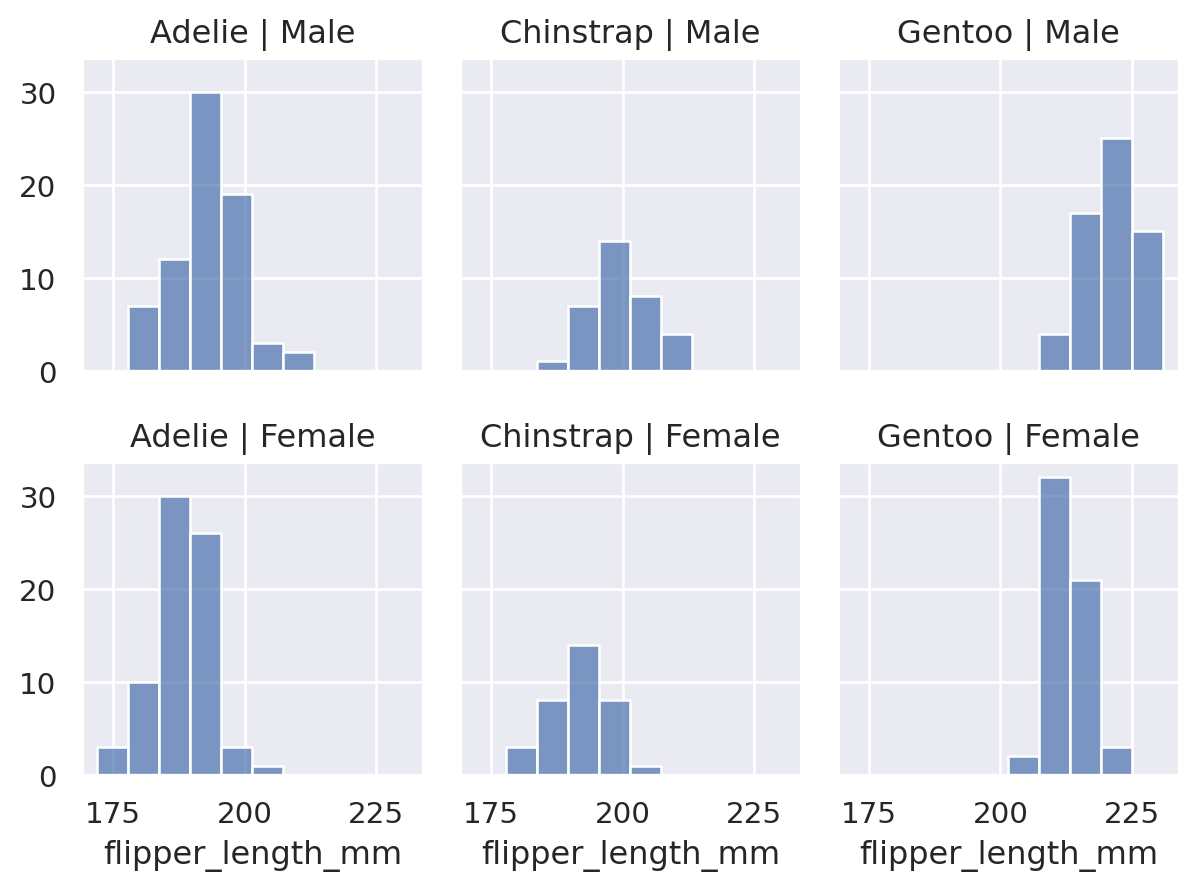

In [ ]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

# 1️⃣ `so.Plot(penguins, x="flipper_length_mm")`

- نبدأ برسم باستخدام **Seaborn Objects API**.  
- `penguins` → البيانات المستخدمة (**مجموعة بيانات البطاريق**).  
- `x="flipper_length_mm"` → **المحور X** يمثل طول الزعانف بالمليمتر لكل بطريق.  

> هذا يحدد المتغير الرئيسي الذي سيتم رسمه على المحور X.

---

# 2️⃣ `.facet(col="species", row="sex")`

- **Facet** = تقسيم الرسم إلى عدة **مخططات فرعية (subplots)** حسب الفئات.  
- `col="species"` → تقسيم الأعمدة حسب نوع البطريق (**Adelie, Chinstrap, Gentoo**).  
- `row="sex"` → تقسيم الصفوف حسب جنس البطريق (**male, female**).  

> النتيجة: شبكة من الرسوم الفرعية، كل مربع يمثل مجموعة فريدة (**نوع + جنس**).  
> مثال:  
> - مربع واحد = الذكور من نوع Adelie  
> - مربع آخر = الإناث من نوع Chinstrap، وهكذا.

---

# 3️⃣ `.add(so.Bars(), so.Hist())`

- `so.Bars()` → إضافة **أعمدة** على الرسم.  
- `so.Hist()` → الأعمدة تمثل **Histogram**، أي **توزيع البيانات على طول المحور X (طول الزعانف)**.  

> باختصار: لكل مجموعة (**نوع × جنس**) سيكون لديك **Histogram مستقل لطول الزعانف**.

---

💡 **النتيجة النهائية**

- ستظهر **شبكة من الرسوم الفرعية (FacetGrid)**:  
  - **الأعمدة** → أنواع البطاريق  
  - **الصفوف** → الجنس (**ذكر/أنثى**)  
  - كل مربع = **Histogram لطول الزعانف لتلك المجموعة**

- هذا يسهل:  
  - مقارنة **توزيع طول الزعانف بين الأنواع المختلفة لكل جنس**  
  - ملاحظة **الفروق بين الذكور والإناث داخل كل نوع بطريق**


In [ ]:
dowjones = sns.load_dataset("dowjones")
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


مصطلح Dow Jones يُترجم إلى داو جونز بالعربية.

عادة يُقصد به مؤشر داو جونز الصناعي (Dow Jones Industrial Average – DJIA) وهو أحد أشهر مؤشرات الأسهم الأمريكية ويُستخدم لقياس أداء سوق الأسهم الأمريكية.

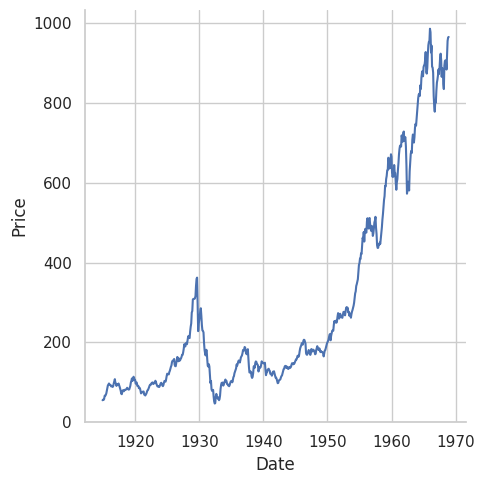

In [ ]:
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# 2️⃣ `data = fmri`

- **البيانات المستخدمة:** هنا مجموعة بيانات **fMRI (Functional MRI)** المتوفرة ضمن مكتبة **Seaborn**.  
- تحتوي عادةً على أعمدة مثل:  
  - `subject` → الشخص الذي أخذت منه البيانات  
  - `region` → منطقة الدماغ  
  - `timepoint` → الزمن أو النقطة الزمنية لكل قراءة  
  - `signal` → إشارة **fMRI** في تلك النقطة


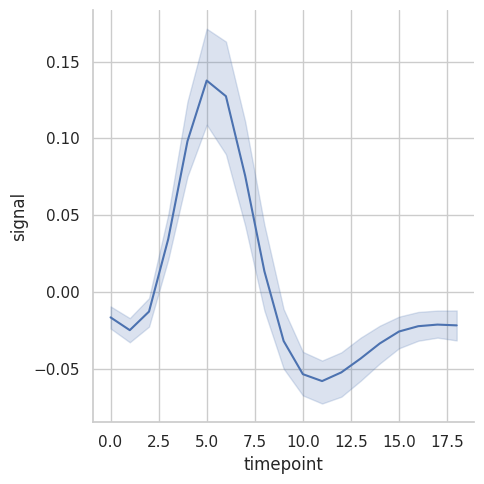

In [ ]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

# 3️⃣ `x="timepoint"` و `y="signal"`

- **المحور X** → النقطة الزمنية (**timepoint**)  
- **المحور Y** → إشارة fMRI (**signal**)  
- كل خط سيظهر **تغير الإشارة عبر الزمن**

---

# 4️⃣ `kind="line"`

- هذا يحدد أن الرسم سيكون **Line Plot** أي خط يربط بين النقاط الزمنية لكل قياس.  
- يساعدك على رؤية **الاتجاه أو التغير مع الوقت**

---

💡 **النتيجة النهائية**

- الرسم يظهر **إشارة fMRI مقابل الزمن**:  
  - **X** → الوقت (**timepoint**)  
  - **Y** → الإشارة (**signal**)  
- كل خط يمثل **تغير الإشارة على طول الزمن**  
- يمكن لاحقًا إضافة تمييز باستخدام `hue` أو `style` لرؤية الاختلاف بين **الأشخاص أو مناطق الدماغ**


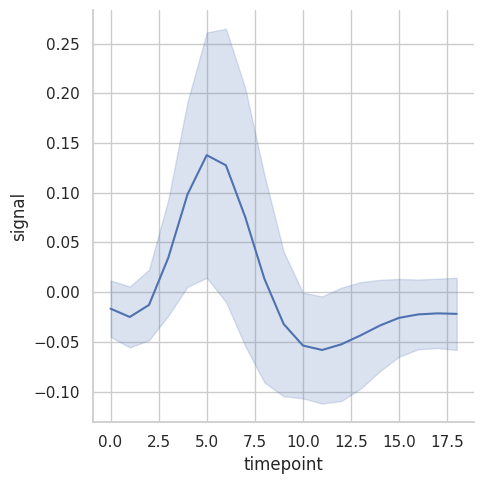

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

# `errorbar="sd"`

- هذا يعني **إظهار شريط الخطأ (error bar)** حول الخط.  
- `"sd"` → يُظهر **الانحراف المعياري (standard deviation)** لكل نقطة زمنية.  
- **الغرض:** توضيح **التباين أو الاختلاف بين القياسات عند كل نقطة زمنية**.


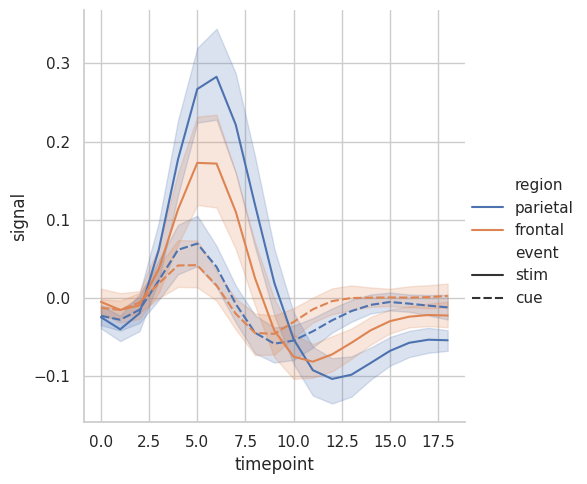

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

# 2️⃣ `data = fmri`

- **البيانات المستخدمة:** مجموعة بيانات **fMRI (Functional MRI)** المدمجة في **Seaborn**.  
- **الأعمدة المهمة:**  
  - `timepoint` → الزمن أو النقطة الزمنية لكل قياس  
  - `signal` → إشارة fMRI في كل نقطة  
  - `region` → منطقة الدماغ  
  - `event` → نوع الحدث أو التجربة المرتبطة بالقياس

---

# 3️⃣ `x="timepoint"` و `y="signal"`

- **المحور X** → الزمن (**timepoint**)  
- **المحور Y** → إشارة fMRI (**signal**)  
- كل خط يمثل **التغير في الإشارة عبر الزمن**

---

# 4️⃣ `hue="region"`

- اللون يميز **منطقة الدماغ (region)**  
- كل منطقة لها **لون مختلف** → يساعد على المقارنة بين المناطق المختلفة

---

# 5️⃣ `style="event"`

- **شكل الخط (line style)** يميز نوع الحدث أو التجربة (**event**)  
- مثال:  
  - خط متصل = حدث A  
  - خط منقط = حدث B  
- هذا يضيف **طبقة تمييز إضافية** لتوضيح الاختلاف بين الأحداث

---

💡 **النتيجة النهائية**

- الرسم سيكون **Line Plot متعدد الخطوط**:  
  - **X** → الزمن  
  - **Y** → إشارة fMRI  
  - **اللون** → المنطقة الدماغية  
  - **شكل الخط** → نوع الحدث  

- يمكن بسهولة رؤية:  
  - كيف تتغير الإشارة عبر الزمن لكل منطقة دماغية  
  - كيف تختلف الاستجابة حسب الحدث أو التجربة


## 4. Relational Plots (Two Variables)
- Visualize relationships between variables.
- Scatter Plot

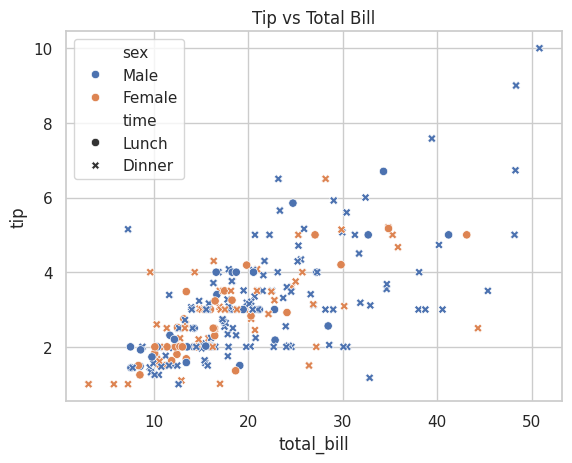

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style="time")
plt.title("Tip vs Total Bill")
plt.show()

# 1️⃣ `sns.scatterplot(...)`

- دالة من مكتبة **Seaborn** لرسم **Scatter Plot** أي رسم النقاط.  
- كل نقطة تمثل **فاتورة واحدة**.

---

## المعاملات:

- `data=tips` → البيانات المستخدمة (**مجموعة بيانات المطاعم**)  
- `x="total_bill"` → **المحور X** يمثل إجمالي الفاتورة  
- `y="tip"` → **المحور Y** يمثل المبلغ المقدم كبقشيش  
- `hue="sex"` → **لون النقاط** يعتمد على جنس الزبون (**male** أو **female**)  
- `style="time"` → **شكل النقاط** يعتمد على الوقت (**Lunch** أو **Dinner**)

---

> هذا يسمح لك بملاحظة العلاقة بين الفاتورة والبقشيش، مع رؤية الفرق حسب الجنس والوقت.


- Line Plot

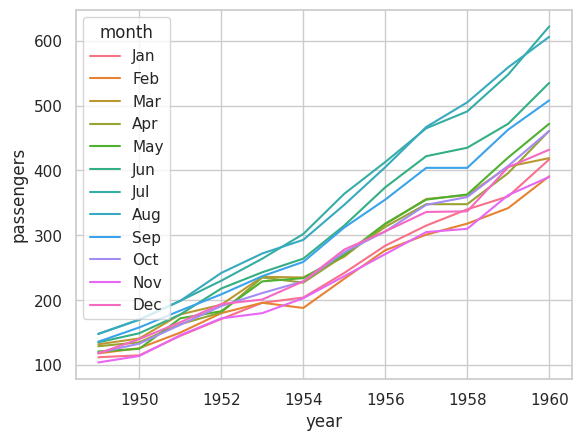

In [ ]:
flights = sns.load_dataset("flights")
sns.lineplot(data=flights, x="year", y="passengers", hue="month")
plt.show()

- relplot (figure-level for scatter/line)

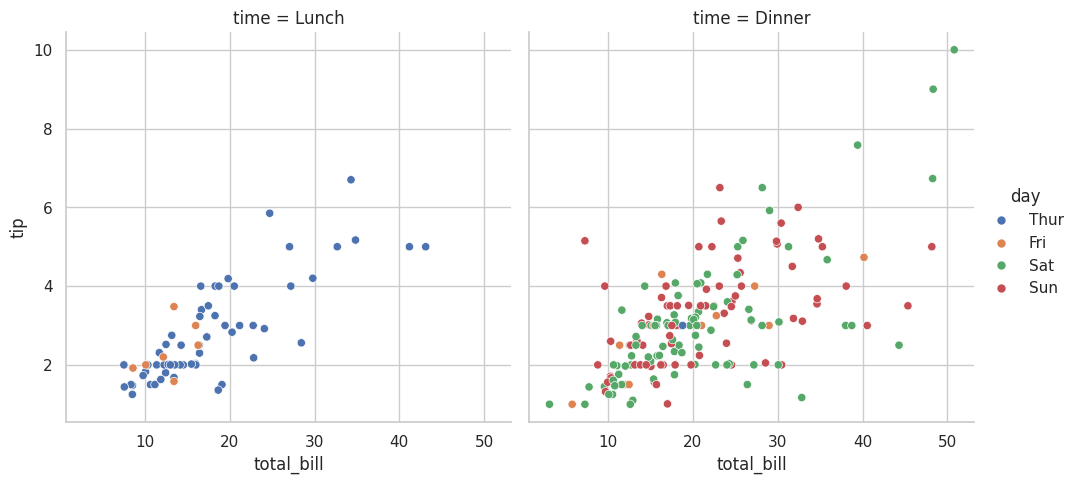

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", kind="scatter")
plt.show()  # Creates subplots by 'time'

## 5. Categorical Plots
- For data with categories.
- Bar Plot (mean by default)

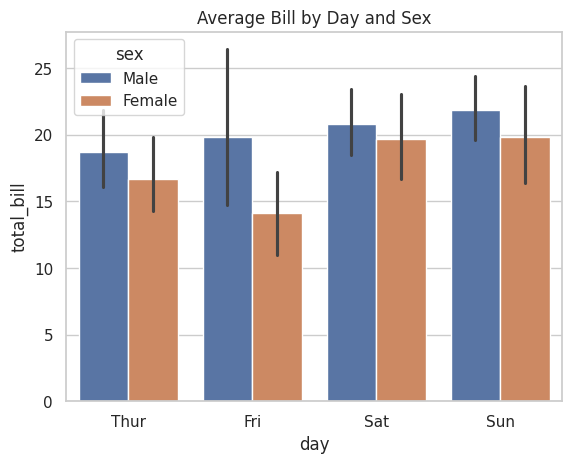

In [ ]:
sns.barplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title("Average Bill by Day and Sex")
plt.show()

- Count Plot

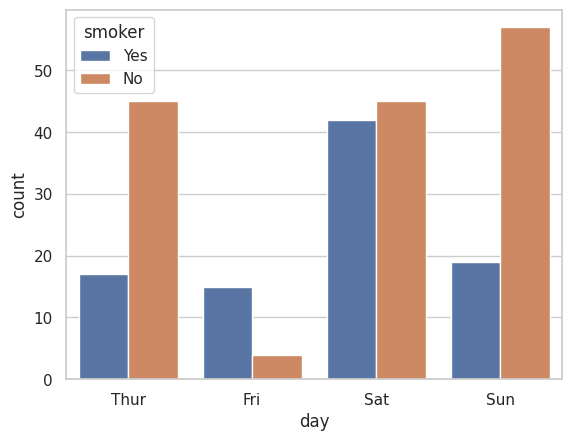

In [ ]:
sns.countplot(data=tips, x="day", hue="smoker")
plt.show()

- Box Plot

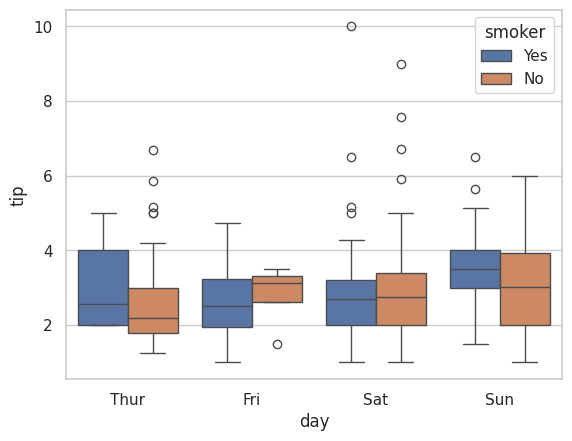

In [ ]:
sns.boxplot(data=tips, x="day", y="tip", hue="smoker")
plt.show()

- Violin Plot (distribution + box)

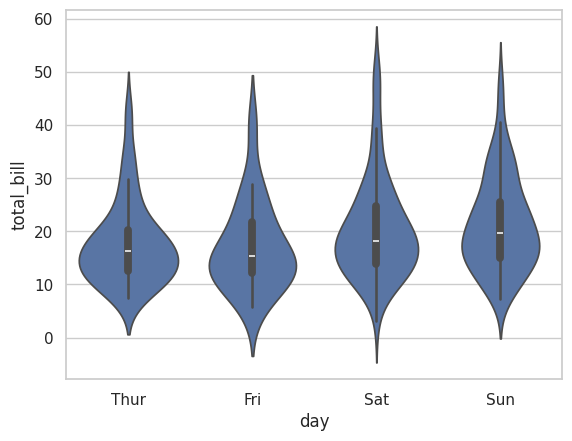

In [ ]:
sns.violinplot(data=tips, x="day", y="total_bill")
plt.show()

- Strip Plot / Swarm Plot

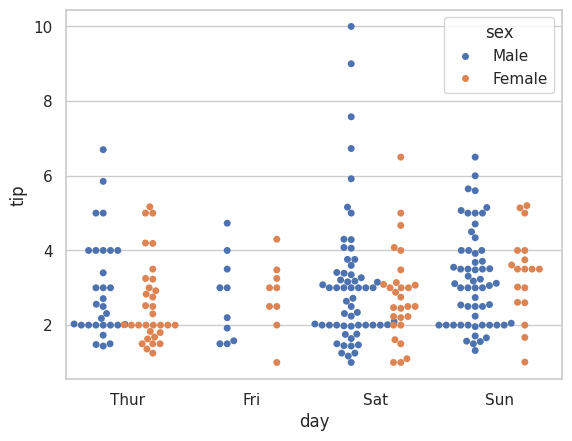

In [ ]:
sns.swarmplot(data=tips, x="day", y="tip", hue="sex", dodge=True)
plt.show()

- catplot (figure-level)

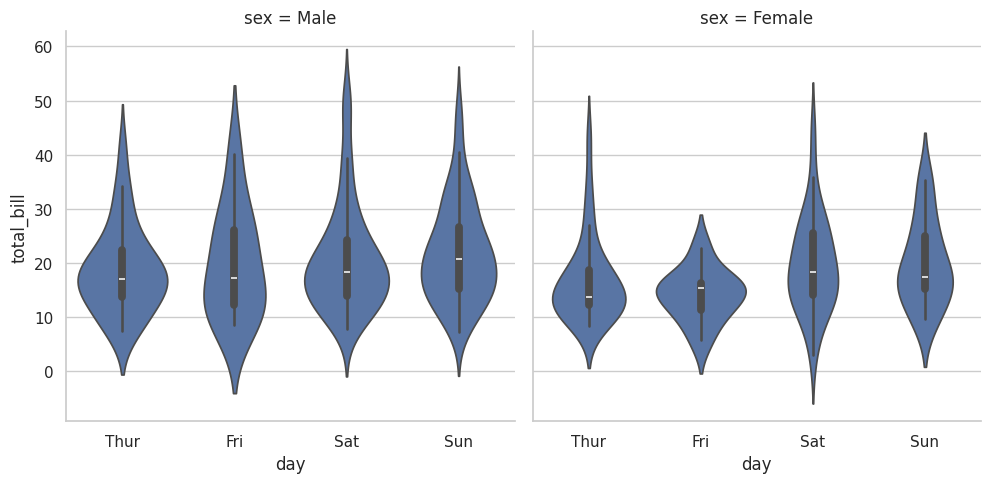

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="violin", col="sex")
plt.show()

## 6. Regression Plots
Automatic linear regression.

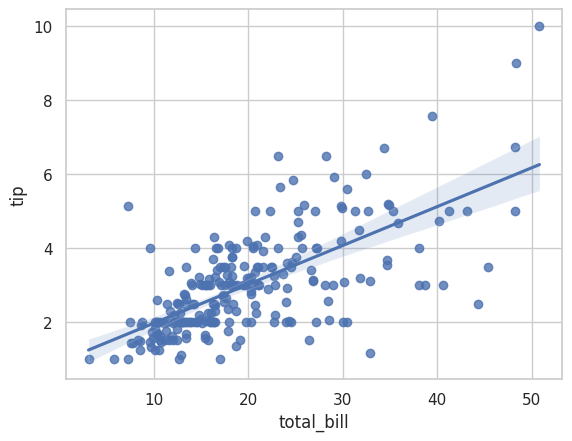

In [ ]:
sns.regplot(data=tips, x="total_bill", y="tip")
plt.show()

# 1️⃣ `sns.regplot(...)`

- دالة من مكتبة **Seaborn** لرسم **Scatter Plot + Regression Line**.  
- تُستخدم لفحص العلاقة بين متغيرين رقميين ولرؤية **اتجاه العلاقة**.

---

## المعاملات:

- `data=tips` → البيانات المستخدمة (**مجموعة بيانات المطاعم**)  
- `x="total_bill"` → **المحور X** يمثل إجمالي الفاتورة  
- `y="tip"` → **المحور Y** يمثل المبلغ المقدم كبقشيش  

---

> الدالة ستعرض النقاط الفعلية لكل فاتورة بالإضافة إلى **خط الانحدار الخطي (Linear Regression Line)** الذي يمثل الاتجاه العام للعلاقة.


- lmplot (with facets)

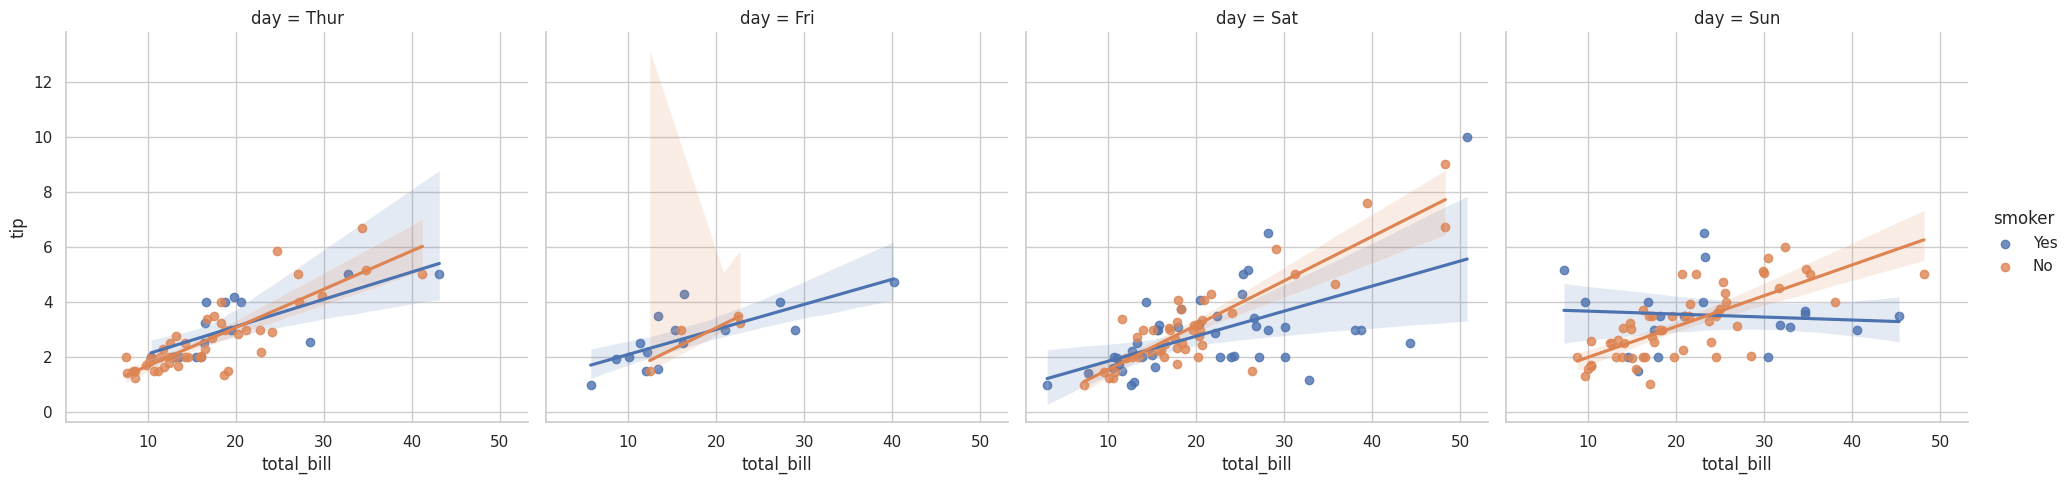

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", col="day")
plt.show()

## 7. Matrix Plots (Multi-Variable)
Heatmap (correlations)

# 1️⃣ `tips.corr(numeric_only=True)`

- **`corr()`** هي دالة من مكتبة **Pandas** لحساب **مصفوفة الارتباط (Correlation Matrix)** بين الأعمدة الرقمية.  
- `numeric_only=True` → فقط الأعمدة الرقمية سيتم احتساب الارتباط لها، مثل:  
  - `total_bill`  
  - `tip`  
  - `size`

---

## مفهوم الارتباط (Correlation):

- **+1** → علاقة موجبة قوية (عندما يزيد X يزيد Y)  
- **-1** → علاقة سالبة قوية (عندما يزيد X يقل Y)  
- **0** → لا توجد علاقة خطية

---

> **النتيجة:** DataFrame مربع يحتوي على قيم بين **-1 و +1** تمثل قوة واتجاه العلاقة بين كل عمودين رقميين.


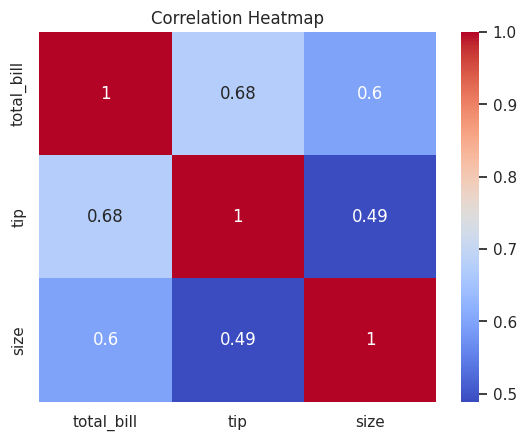

In [ ]:
# Correlation matrix
corr = tips.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 2️⃣ `sns.heatmap(corr, annot=True, cmap="coolwarm")`

- **`sns.heatmap`** → دالة من **Seaborn** لرسم **Heatmap**  
- `corr` → البيانات التي سيتم رسمها (**مصفوفة الارتباط**)  
- `annot=True` → **إظهار القيم الرقمية** على كل خلية من الـ Heatmap  
- `cmap="coolwarm"` → **تدرج الألوان**:  
  - أزرق → القيم السالبة  
  - أحمر → القيم الموجبة  

> يساعد على **رؤية قوة العلاقة بصريًا** بين الأعمدة الرقمية.


## 9. Styling and Customization
Color Palettes

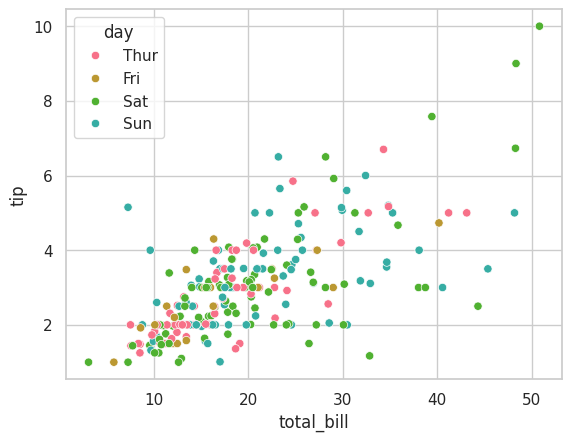

In [ ]:
sns.set_palette("husl")  # Or "deep", "muted", "bright", etc.
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")
plt.show()

- Contexts and Sizes

In [ ]:
sns.set_context("talk")  # paper, notebook, talk, poster

# 1️⃣ ما هي `sns.set_context`؟

- هي دالة من مكتبة **Seaborn** للتحكم في **حجم الخطوط وحجم العناصر** في الرسوم البيانية.  
- **الهدف:** تعديل الرسوم لتناسب نوع العرض أو الاستخدام.

---

# 2️⃣ المعامل `"talk"`

- هذا النمط (**context**) يضبط **حجم النصوص والعناوين والمحاور والعناصر الرسومية** ليكون مناسبًا لعروض تقديمية أو محاضرات.  

---

## خيارات أخرى شائعة:

- `"paper"` → حجم صغير جدًا، مناسب للأوراق العلمية أو المقالات.  
- `"notebook"` → الحجم الافتراضي، مناسب للـ **Jupyter Notebook**.  
- `"talk"` → حجم أكبر، مناسب للعروض التقديمية أو المحاضرات.  
- `"poster"` → حجم كبير جدًا، مناسب للملصقات الكبيرة (**Poster**).


- Combining with Matplotlib

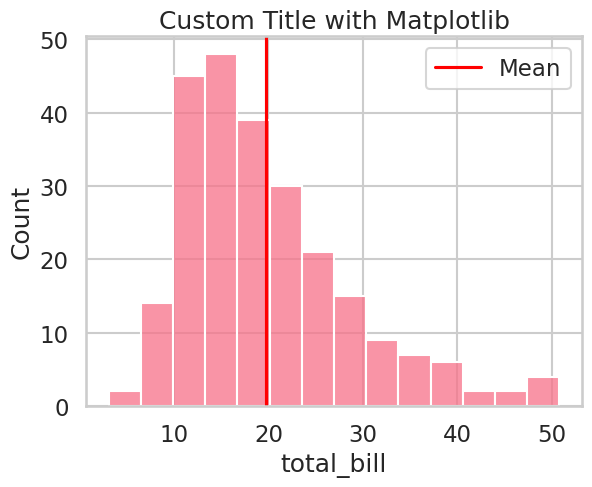

In [ ]:
ax = sns.histplot(data=tips, x="total_bill")
ax.set_title("Custom Title with Matplotlib")
ax.axvline(tips["total_bill"].mean(), color="red", label="Mean")
ax.legend()
plt.show()

# 1️⃣ `ax = sns.histplot(data=tips, x="total_bill")`

- **`sns.histplot`** → دالة من **Seaborn** لرسم **Histogram**، أي توزيع البيانات في أعمدة (**bins**).  
- `data=tips` → البيانات المستخدمة (**مجموعة بيانات المطاعم**)  
- `x="total_bill"` → **المحور X** يمثل إجمالي الفاتورة  
- `ax = ...` → حفظ الرسم في متغير **ax** من **Matplotlib** حتى نتمكن من تعديل الرسم بعد إنشائه  

> **النتيجة:** رسم توزيع `total_bill`

---

# 2️⃣ `ax.set_title("Custom Title with Matplotlib")`

- يضيف **عنوان للرسم** باستخدام **Matplotlib**  
- هنا العنوان هو `"Custom Title with Matplotlib"`

---

# 3️⃣ `ax.axvline(tips["total_bill"].mean(), color="red", label="Mean")`

- `axvline` → يرسم **خط عمودي** على الرسم  
- `tips["total_bill"].mean()` → قيمة **متوسط إجمالي الفاتورة**  
- `color="red"` → لون الخط أحمر  
- `label="Mean"` → تسمية الخط في **Legend**  

> **الغرض:** إظهار **متوسط الفاتورة** على الرسم بصريًا

---

# 4️⃣ `ax.legend()`

- يظهر **مفتاح الرسم (Legend)**، يوضح معنى الخط الأحمر (**Mean**)

---

# 5️⃣ `plt.show()`

- يعرض الرسم في نافذة أو داخل الـ **notebook**

---

💡 **النتيجة النهائية**

- **Histogram** يوضح **توزيع إجمالي الفاتورة**  
- **خط عمودي أحمر** يمثل المتوسط  
- **عنوان مخصص** للرسم  
- **مفتاح (Legend)** يوضح معنى الخط الأحمر
